In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs

In [18]:
# Generate high-dimensional synthetic data
X, y = make_blobs(n_samples=300, centers=5, n_features=50, random_state=42)

In [19]:
X.shape, y.shape

((300, 50), (300,))

In [20]:
# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_embedded = tsne.fit_transform(X)

In [21]:
X_embedded.shape

(300, 2)

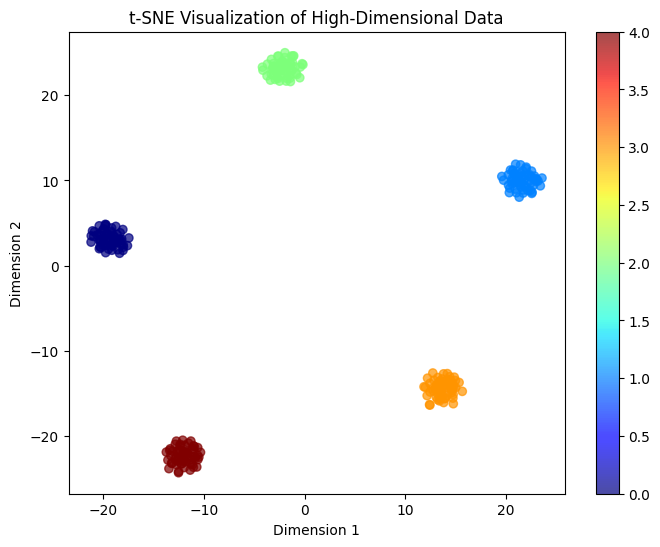

In [22]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap="jet", alpha=0.7)
plt.colorbar()
plt.title("t-SNE Visualization of High-Dimensional Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()